#**CROP YIELD PREDICTION**

#Dataset 1

##Reading Dataset

In [1]:
import pandas as pd
df = pd.read_csv('all_india_dataset_final.csv',na_values='=')
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004
1,1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004
2,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005
3,3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006
4,4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,298.981061,2.130629,1017.475515,58,sandy,9.630,24.610,0.000,801.0,1008
246087,246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,298.500908,2.597150,1014.759444,57,loamy,56.070,0.000,0.000,463.0,1008
246088,246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,298.278013,2.063913,1015.164139,59,peaty,9.000,9.000,0.000,16250.0,1009
246089,246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,297.921484,2.490068,1016.098126,57,silt,0.000,0.000,0.000,597899.0,1009


In [3]:
df=df.drop('Unnamed: 0', axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_names     246091 non-null  object 
 1   district_names  246091 non-null  object 
 2   crop_year       246091 non-null  int64  
 3   season_names    246091 non-null  object 
 4   crop_names      246091 non-null  object 
 5   area            246091 non-null  float64
 6   temperature     246091 non-null  float64
 7   wind_speed      246091 non-null  float64
 8   precipitation   246091 non-null  float64
 9   humidity        246091 non-null  int64  
 10  soil_type       246091 non-null  object 
 11  N               246091 non-null  float64
 12  P               246091 non-null  float64
 13  K               246091 non-null  float64
 14  production      242364 non-null  float64
 15  pressure        246091 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 30.0+ M

In [5]:
df.columns


Index(['state_names', 'district_names', 'crop_year', 'season_names',
       'crop_names', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'soil_type', 'N', 'P', 'K', 'production', 'pressure'],
      dtype='object')

In [7]:
df.isnull().sum()

state_names          0
district_names       0
crop_year            0
season_names         0
crop_names           0
area                 0
temperature          0
wind_speed           0
precipitation        0
humidity             0
soil_type            0
N                    0
P                    0
K                    0
production        3727
pressure             0
dtype: int64

In [8]:
df["area"].median()

582.0

In [9]:
unique_state_names = df['state_names'].unique()


In [10]:
unique_state_names

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
df.head(6)

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,293.680202,2.907299,1016.637902,43,chalky,38.250,38.250,38.250,65100000.0,1006


###Making Yield Column

In [15]:
#df=df.head(4000)

In [16]:
#graphical analysis

In [17]:
df.columns

Index(['state_names', 'district_names', 'crop_year', 'season_names',
       'crop_names', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'soil_type', 'N', 'P', 'K', 'production', 'pressure'],
      dtype='object')

In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

In [25]:
C_mat = df.corr()

In [26]:
C_mat 

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,production,pressure
crop_year,1.000000,-0.026022,-0.033821,-0.001246,0.006407,-0.004115,0.000331,0.000924,0.000623,0.006989,0.044929
area,-0.026022,1.000000,0.007677,0.005709,-0.004891,0.024417,-0.001889,-0.000523,0.000194,0.040588,-0.049460
temperature,-0.033821,0.007677,1.000000,0.000147,-0.063287,-0.385657,-0.000006,0.000318,0.000448,0.002202,-0.304873
wind_speed,-0.001246,0.005709,0.000147,1.000000,-0.023622,-0.010672,0.001855,0.001515,0.002881,0.000893,0.008299
precipitation,0.006407,-0.004891,-0.063287,-0.023622,1.000000,0.020633,-0.001639,0.001901,0.001193,-0.000120,0.063354
humidity,-0.004115,0.024417,-0.385657,-0.010672,0.020633,1.000000,0.000112,-0.000316,-0.000211,0.008969,-0.224419
N,0.000331,-0.001889,-0.000006,0.001855,-0.001639,0.000112,1.000000,-0.103690,-0.068799,-0.002664,-0.000220
P,0.000924,-0.000523,0.000318,0.001515,0.001901,-0.000316,-0.103690,1.000000,0.866379,-0.004631,0.000720
K,0.000623,0.000194,0.000448,0.002881,0.001193,-0.000211,-0.068799,0.866379,1.000000,-0.005194,0.000647
production,0.006989,0.040588,0.002202,0.000893,-0.000120,0.008969,-0.002664,-0.004631,-0.005194,1.000000,0.042625


##Corelation Heatmap

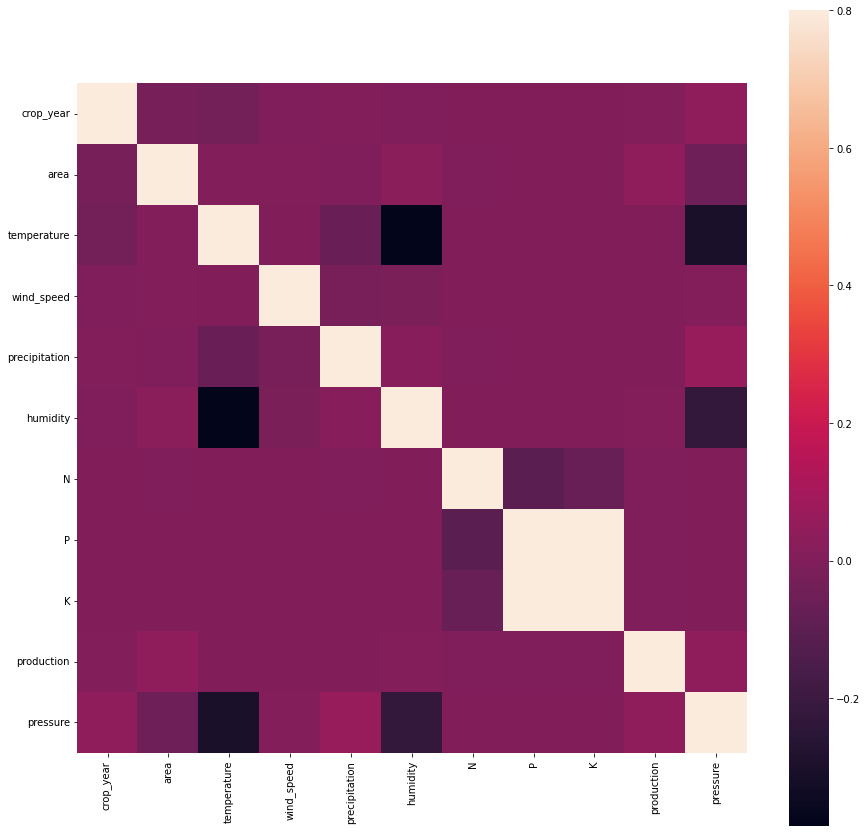

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [28]:
df.columns

Index(['state_names', 'district_names', 'crop_year', 'season_names',
       'crop_names', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'soil_type', 'N', 'P', 'K', 'production', 'pressure'],
      dtype='object')

##converting data to numerical form

In [29]:
df.columns

Index(['state_names', 'district_names', 'crop_year', 'season_names',
       'crop_names', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'soil_type', 'N', 'P', 'K', 'production', 'pressure'],
      dtype='object')

In [30]:
#

In [20]:
df = df.join(pd.get_dummies(df['state_names']))
df = df.join(pd.get_dummies(df['district_names']))
df = df.join(pd.get_dummies(df['season_names']))
df = df.join(pd.get_dummies(df['crop_names']))
df = df.join(pd.get_dummies(df['soil_type']))
df

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,...,other fibres,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,...,0,0,0,0,1,0,0,0,0,0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,...,0,0,0,0,0,0,0,1,0,0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,...,0,0,0,0,1,0,0,0,0,0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,...,0,0,0,0,0,0,1,0,0,0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,298.981061,2.130629,1017.475515,58,...,0,0,0,0,0,0,0,1,0,0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,298.500908,2.597150,1014.759444,57,...,0,0,0,0,0,1,0,0,0,0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,298.278013,2.063913,1015.164139,59,...,0,0,0,0,0,0,1,0,0,0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,297.921484,2.490068,1016.098126,57,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df['Yield'] = df['production']/df['area']
df

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,...,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,...,0,0,0,1,0,0,0,0,0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,...,0,0,0,0,0,0,1,0,0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,...,0,0,0,1,0,0,0,0,0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,...,0,0,0,0,0,1,0,0,0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,...,0,0,0,1,0,0,0,0,0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,298.981061,2.130629,1017.475515,58,...,0,0,0,0,0,0,1,0,0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,298.500908,2.597150,1014.759444,57,...,0,0,0,0,1,0,0,0,0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,298.278013,2.063913,1015.164139,59,...,0,0,0,0,0,1,0,0,0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,297.921484,2.490068,1016.098126,57,...,0,0,0,0,0,0,0,1,0,2.141848


In [22]:
df = df.drop('production', axis=1)

##Dropping Unecessory Columns

In [23]:
df=df.drop('district_names', axis=1)
df = df.drop('season_names',axis=1)
df = df.drop('crop_names',axis=1)




In [24]:
df = df.drop('state_names', axis=1)
df = df.drop('soil_type', axis=1)
df

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,pressure,...,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
0,2000,1254.0,292.640631,2.379571,1016.868671,43,598.552,0.000,0.000,1004,...,0,0,0,1,0,0,0,0,0,1.594896
1,2000,2.0,292.703959,2.906544,1015.245398,44,7.182,18.354,0.000,1004,...,0,0,0,0,0,0,1,0,0,0.500000
2,2000,102.0,294.087464,2.139227,1015.611196,42,35.742,0.000,0.000,1005,...,0,0,0,1,0,0,0,0,0,3.147059
3,2000,176.0,293.216917,2.328995,1017.669100,42,8.740,8.740,0.000,1006,...,0,0,0,0,0,1,0,0,0,3.642045
4,2000,720.0,292.782403,2.688837,1015.646975,44,0.615,0.615,0.615,1004,...,0,0,0,1,0,0,0,0,0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,298.981061,2.130629,1017.475515,58,9.630,24.610,0.000,1008,...,0,0,0,0,0,0,1,0,0,2.617647
246087,2014,627.0,298.500908,2.597150,1014.759444,57,56.070,0.000,0.000,1008,...,0,0,0,0,1,0,0,0,0,0.738437
246088,2014,324.0,298.278013,2.063913,1015.164139,59,9.000,9.000,0.000,1009,...,0,0,0,0,0,1,0,0,0,50.154321
246089,2014,279151.0,297.921484,2.490068,1016.098126,57,0.000,0.000,0.000,1009,...,0,0,0,0,0,0,0,1,0,2.141848


In [25]:
df

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,pressure,...,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
0,2000,1254.0,292.640631,2.379571,1016.868671,43,598.552,0.000,0.000,1004,...,0,0,0,1,0,0,0,0,0,1.594896
1,2000,2.0,292.703959,2.906544,1015.245398,44,7.182,18.354,0.000,1004,...,0,0,0,0,0,0,1,0,0,0.500000
2,2000,102.0,294.087464,2.139227,1015.611196,42,35.742,0.000,0.000,1005,...,0,0,0,1,0,0,0,0,0,3.147059
3,2000,176.0,293.216917,2.328995,1017.669100,42,8.740,8.740,0.000,1006,...,0,0,0,0,0,1,0,0,0,3.642045
4,2000,720.0,292.782403,2.688837,1015.646975,44,0.615,0.615,0.615,1004,...,0,0,0,1,0,0,0,0,0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,298.981061,2.130629,1017.475515,58,9.630,24.610,0.000,1008,...,0,0,0,0,0,0,1,0,0,2.617647
246087,2014,627.0,298.500908,2.597150,1014.759444,57,56.070,0.000,0.000,1008,...,0,0,0,0,1,0,0,0,0,0.738437
246088,2014,324.0,298.278013,2.063913,1015.164139,59,9.000,9.000,0.000,1009,...,0,0,0,0,0,1,0,0,0,50.154321
246089,2014,279151.0,297.921484,2.490068,1016.098126,57,0.000,0.000,0.000,1009,...,0,0,0,0,0,0,0,1,0,2.141848


##Preprocessing

In [26]:
from sklearn import preprocessing

In [27]:
'''
# Create x, where x the 'scores' column's values as floats
x = df[['area']].values.astype(float)
x
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)
x_scaled

df['area'] = x_scaled
df  '''

"\n# Create x, where x the 'scores' column's values as floats\nx = df[['area']].values.astype(float)\nx\n# Create a minimum and maximum processor object\nmin_max_scaler = preprocessing.MinMaxScaler()\n\n# Create an object to transform the data to fit minmax processor\nx_scaled = min_max_scaler.fit_transform(x)\n\n# Run the normalizer on the dataframe\n#df_normalized = pd.DataFrame(x_scaled)\nx_scaled\n\ndf['area'] = x_scaled\ndf  "

In [28]:
df.head()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,pressure,...,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty,Yield
0,2000,1254.0,292.640631,2.379571,1016.868671,43,598.552,0.000,0.000,1004,...,0,0,0,1,0,0,0,0,0,1.594896
1,2000,2.0,292.703959,2.906544,1015.245398,44,7.182,18.354,0.000,1004,...,0,0,0,0,0,0,1,0,0,0.500000
2,2000,102.0,294.087464,2.139227,1015.611196,42,35.742,0.000,0.000,1005,...,0,0,0,1,0,0,0,0,0,3.147059
3,2000,176.0,293.216917,2.328995,1017.669100,42,8.740,8.740,0.000,1006,...,0,0,0,0,0,1,0,0,0,3.642045
4,2000,720.0,292.782403,2.688837,1015.646975,44,0.615,0.615,0.615,1004,...,0,0,0,1,0,0,0,0,0,0.229167


In [29]:
df.columns

Index(['crop_year', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'N', 'P', 'K', 'pressure',
       ...
       'other misc. pulses', 'other oilseeds', 'chalky', 'clay', 'loamy',
       'peaty', 'sandy', 'silt', 'silty', 'Yield'],
      dtype='object', length=827)

### Filling Empty Values With Mean

In [30]:
df = df.fillna(df.mean())

##Train and Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
a=df

In [33]:
b = df['Yield']
#a = df.drop('Yield', axis = 1)



In [34]:
#c = df.drop('Unnamed: 0', axis = 1)

In [35]:
a=df.drop('Yield', axis = 1)

In [36]:
len(a.columns)

826

In [37]:
a.columns

Index(['crop_year', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'N', 'P', 'K', 'pressure',
       ...
       'other fibres', 'other misc. pulses', 'other oilseeds', 'chalky',
       'clay', 'loamy', 'peaty', 'sandy', 'silt', 'silty'],
      dtype='object', length=826)

In [38]:
features_list=a.columns

In [39]:
a=df[features_list]

In [40]:
a.head()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,pressure,...,other fibres,other misc. pulses,other oilseeds,chalky,clay,loamy,peaty,sandy,silt,silty
0,2000,1254.0,292.640631,2.379571,1016.868671,43,598.552,0.000,0.000,1004,...,0,0,0,0,1,0,0,0,0,0
1,2000,2.0,292.703959,2.906544,1015.245398,44,7.182,18.354,0.000,1004,...,0,0,0,0,0,0,0,1,0,0
2,2000,102.0,294.087464,2.139227,1015.611196,42,35.742,0.000,0.000,1005,...,0,0,0,0,1,0,0,0,0,0
3,2000,176.0,293.216917,2.328995,1017.669100,42,8.740,8.740,0.000,1006,...,0,0,0,0,0,0,1,0,0,0
4,2000,720.0,292.782403,2.688837,1015.646975,44,0.615,0.615,0.615,1004,...,0,0,0,0,1,0,0,0,0,0


In [41]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

print(a_train)
print(a_test)
print(b_train)
print(b_test)

        crop_year     area  temperature  wind_speed  precipitation  humidity  \
198537       2007     53.0   306.627529    2.922505    1014.639700        57   
87970        2013      1.0   300.261597    2.318759    1014.203019        70   
71570        2002    314.0   300.492842    2.315790    1015.477673        86   
10773        2001     16.0   300.913693    2.153528    1016.388218        58   
44519        2005     55.0   309.445627    2.549764    1016.923480        54   
...           ...      ...          ...         ...            ...       ...   
119879       1998  92100.0   300.767996    2.706504    1015.983490        87   
103694       1999    609.0   301.036873    2.590044    1015.354395        94   
131932       2002    800.0   299.423229    2.155789    1014.528245        51   
146867       1999    220.0   300.817941    2.883479    1017.651421        56   
121958       2003    258.0   305.390333    2.267835    1015.186781        64   

             N        P       K  pressu

In [45]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [46]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#a_train = sc.fit_transform(a_train)
#a_test = sc.transform(a_test)

###Random Forest Regressor

In [47]:
#model building  and testing 

In [56]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))

MSE = 684938.2423372074
MAE = 43.61852710509038
R2 Score = -2.8987969415657555


In [57]:
b_test

96862      0.745098
109879     0.000000
1543       0.353293
4688      13.548327
230491     0.559322
            ...    
49601      1.157605
225688     0.458078
19980      1.079148
2876       0.782002
94849      5.300000
Name: Yield, Length: 73828, dtype: float64

In [58]:
b_pred

array([7.5407243, 7.5407243, 7.5407243, ..., 7.5407243, 7.5407243,
       7.5407243])

In [ ]:
from sklearn.svm import SVR

# Create the SVR model
svm_regr = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVR model
svm_regr.fit(a_train[0:10000], b_train[0:10000])

# Predict on test data
b_pred_svm = svm_regr.predict(a_test)

# Calculate evaluation metrics
print('MSE =', mse(b_pred_svm, b_test))
print('MAE =', mae(b_pred_svm, b_test))
print('R2 Score =', r2_score(b_pred_svm, b_test))


###Polynomial Support Vector Machine

In [60]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print(regressorpoly.score(a_test,b_test))
print(r2_score(b_test,b_pred))

0.6864786957332968
0.8601401414634322


###XGBRegressor

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()
XGBModel.fit(a_train,b_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a_test)
MAE = mean_absolute_error(b_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
XGBpredictions

XGBoost validation MAE =  15.346998865257904


array([ 1.0811464,  2.859382 ,  2.3616989, ..., -1.6669676,  2.0176895,
        8.534723 ], dtype=float32)

In [54]:

print(r2_score(b_test , XGBpredictions))

0.8675888229058597


In [54]:
b_test

96862      0.745098
109879     0.000000
1543       0.353293
4688      13.548327
230491     0.559322
            ...    
49601      1.157605
225688     0.458078
19980      1.079148
2876       0.782002
94849      5.300000
Name: Yield, Length: 73828, dtype: float64

In [55]:
XGBpredictions

array([ 1.0811464,  2.859382 ,  2.3616989, ..., -1.6669676,  2.0176895,
        8.534723 ], dtype=float32)

Multilinear Regression Model

In [69]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(a_train,b_train)

LinearRegression()

In [70]:
y_prediction =  LR.predict(a_test)
y_prediction

array([-121.47331813,  -41.06340037,   33.52123471, ...,  141.58288921,
        137.83409384,  -90.46610851])

In [71]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(b_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(b_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(b_test,y_prediction)))

r2 socre is 0.14068505458916214
mean_sqrd_error is== 720830.0582290915
root_mean_squared error of is== 849.0171130366522


In [55]:
import pickle

In [56]:
len(list(features_list))

826

In [57]:
features_list

Index(['crop_year', 'area', 'temperature', 'wind_speed', 'precipitation',
       'humidity', 'N', 'P', 'K', 'pressure',
       ...
       'other fibres', 'other misc. pulses', 'other oilseeds', 'chalky',
       'clay', 'loamy', 'peaty', 'sandy', 'silt', 'silty'],
      dtype='object', length=826)

In [58]:
# Extract column names
column_names =list(features_list)

# Save column names as a pickle file
with open('column_names2.pkl', 'wb') as file:
    pickle.dump(column_names, file)

In [59]:
# Load column names from the pickle file
with open('column_names2.pkl', 'rb') as file:
    loaded_column_names = pickle.load(file)

# Print the loaded column names
print(loaded_column_names)


['crop_year', 'area', 'temperature', 'wind_speed', 'precipitation', 'humidity', 'N', 'P', 'K', 'pressure', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', '24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'ADILABAD', 'AGAR MALWA', 'AGRA', 'AHMADABAD', 'AHMEDNAGAR', 'AIZAWL', 'AJMER', 'AKOLA', 'ALAPPUZHA', 'ALIGARH', 'ALIRAJPUR', 'ALLAHABAD', 'ALMORA', 'ALWAR', 'AMBALA', 'AMBEDKAR NAGAR', 'AMETHI', 'AMRAVATI', 'AMRELI', 'AMRITSAR', 'AMROHA', 'ANAND', 'ANANTAPUR', 'ANANTNAG', 'ANJAW', 'ANUGUL', 'ANUPPUR', 'ARARIA', 'ARIYALUR', 'ARWAL', 'ASHOKNAGAR', 'AURAIYA', 'AURANGABAD', '

In [60]:
import pickle

# Create a list of length 795 with all zeros
my_list = [0] * 826

# Save the list as a pickle file
with open('zero_list2.pkl', 'wb') as file:
    pickle.dump(my_list, file)

# Load the list from the pickle file
with open('zero_list2.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

# Print the loaded list
print(loaded_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#df.to_csv("karnataka.csv")

In [61]:
# Save the model to a file using pickle
with open('xgboost_model_india2.pkl', 'wb') as f:
    pickle.dump(XGBModel, f)

In [62]:
# Load the model from the saved file
with open('xgboost_model_india2.pkl', 'rb') as f:
    model = pickle.load(f)

In [1]:
models=["random forest","SVR","Xgboost","Linear Regression"]
accuracies=[29,86,86.75,14]

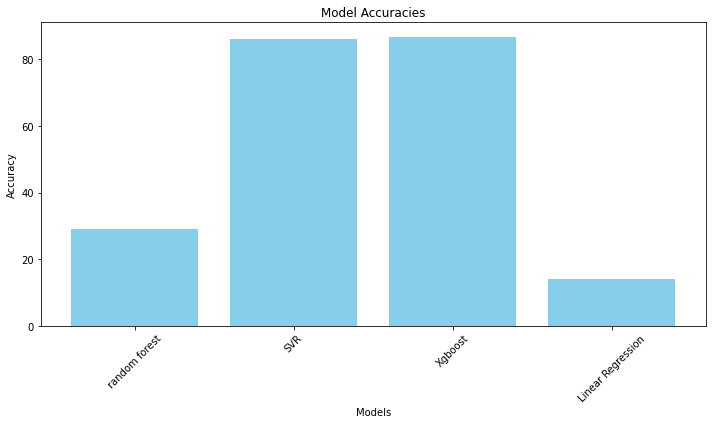

In [2]:
import matplotlib.pyplot as plt

# Example data
#models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
#accuracies = [0.85, 0.92, 0.78, 0.88]

# Create bar graph
plt.figure(figsize=(10, 6)) # Adjust the figure size if necessary
plt.bar(models, accuracies, color='skyblue')

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show plot
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout
plt.show()